# Competition Math 数据集分析

## 简介

本notebook用于分析从Hugging Face下载的competition_math数据集。该数据集包含来自数学竞赛的问题，如AMC 10、AMC 12、AIME等，每个问题都有完整的逐步解答。

数据集来源: https://huggingface.co/datasets/qwedsacf/competition_math

In [10]:
# 导入必要的库
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import pyarrow.parquet as pq

# 设置中文字体支持
plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

# 设置图形样式
sns.set_style("whitegrid")
%matplotlib inline

## 数据加载

让我们加载competition_math数据集并查看其基本结构。

In [11]:
# 定义数据集路径
dataset_path = "/Users/jia/datasets/competition_math"
parquet_file = os.path.join(dataset_path, "data", "train-00000-of-00001-7320a6f3aba8ebd2.parquet")

# 检查数据集路径是否存在
print("=== 数据集信息 ===")
print(f"数据集路径: {dataset_path}")
print(f"路径是否存在: {os.path.exists(dataset_path)}")
print(f"Parquet文件是否存在: {os.path.exists(parquet_file)}")

# 加载数据
print("\n=== 加载数据 ===")
table = pq.read_table(parquet_file)
df = table.to_pandas()

print(f"数据集形状: {df.shape}")
print(f"列名: {list(df.columns)}")
print(f"数据类型:\n{df.dtypes}")

=== 数据集信息 ===
数据集路径: /Users/jia/datasets/competition_math
路径是否存在: True
Parquet文件是否存在: True

=== 加载数据 ===
数据集形状: (12500, 4)
列名: ['problem', 'level', 'type', 'solution']
数据类型:
problem     object
level       object
type        object
solution    object
dtype: object


## 数据概览

现在让我们查看数据的基本统计信息和前几行记录。

In [12]:
# 显示数据集基本信息
print("=== 数据集基本信息 ===")
print(f"总记录数: {len(df)}")
print(f"列数: {len(df.columns)}")
print(f"缺失值:\n{df.isnull().sum()}")

# 显示前5行数据
print("\n=== 前5行数据 ===")
df.head()

=== 数据集基本信息 ===
总记录数: 12500
列数: 4
缺失值:
problem     0
level       0
type        0
solution    0
dtype: int64

=== 前5行数据 ===


,problem,level,type,solution
0,"Let \[f(x) = \left\{\n\begin{array}{cl} ax+3, ...",Level 5,Algebra,"For the piecewise function to be continuous, t..."
1,A rectangular band formation is a formation wi...,Level 5,Algebra,Let $x$ be the number of band members in each ...
2,What is the degree of the polynomial $(4 +5x^3...,Level 3,Algebra,This polynomial is not written in standard for...
3,Evaluate $\left\lceil3\left(6-\frac12\right)\r...,Level 3,Algebra,"Firstly, $3\left(6-\frac12\right)=18-1-\frac12..."
4,Sam is hired for a 20-day period. On days that...,Level 3,Algebra,Call $x$ the number of days Sam works and $y$ ...


## 统计分析

让我们对数据集进行详细的统计分析，包括问题类型分布和难度等级分布。

In [13]:
# 问题类型分布
print("=== 问题类型分布 ===")
type_counts = df['type'].value_counts()
type_percentages = df['type'].value_counts(normalize=True) * 100

type_distribution = pd.DataFrame({
    '数量': type_counts,
    '百分比': type_percentages
})
print(type_distribution)

# 难度等级分布
print("\n=== 难度等级分布 ===")
level_counts = df['level'].value_counts()
level_percentages = df['level'].value_counts(normalize=True) * 100

level_distribution = pd.DataFrame({
    '数量': level_counts,
    '百分比': level_percentages
})
print(level_distribution)

# 问题类型和难度等级交叉分析
print("\n=== 问题类型和难度等级交叉分布 ===")
cross_tab = pd.crosstab(df['type'], df['level'], margins=True)
print(cross_tab)

=== 问题类型分布 ===
                          数量     百分比
type                                
Algebra                 2931  23.448
Intermediate Algebra    2198  17.584
Prealgebra              2076  16.608
Number Theory           1409  11.272
Geometry                1349  10.792
Precalculus             1292  10.336
Counting & Probability  1245   9.960

=== 难度等级分布 ===
           数量     百分比
level                
Level 5  3628  29.024
Level 4  2904  23.232
Level 3  2723  21.784
Level 2  2242  17.936
Level 1  1001   8.008
Level ?     2   0.016

=== 问题类型和难度等级交叉分布 ===
level                   Level 1  Level 2  Level 3  Level 4  Level 5  Level ?  \
type                                                                           
Algebra                     313      541      653      681      743        0   
Counting & Probability       89      220      260      277      399        0   
Geometry                     79      182      231      302      553        2   
Intermediate Algebra        110      

## 数据可视化

通过图表更直观地展示数据分布。

/Users/jia/workspace/.venv/lib/python3.14/site-packages/seaborn/utils.py:61: UserWarning: Glyph 38382 (\N{CJK UNIFIED IDEOGRAPH-95EE}) missing from font(s) Arial.
  fig.canvas.draw()
/Users/jia/workspace/.venv/lib/python3.14/site-packages/seaborn/utils.py:61: UserWarning: Glyph 39064 (\N{CJK UNIFIED IDEOGRAPH-9898}) missing from font(s) Arial.
  fig.canvas.draw()
/Users/jia/workspace/.venv/lib/python3.14/site-packages/seaborn/utils.py:61: UserWarning: Glyph 31867 (\N{CJK UNIFIED IDEOGRAPH-7C7B}) missing from font(s) Arial.
  fig.canvas.draw()
/Users/jia/workspace/.venv/lib/python3.14/site-packages/seaborn/utils.py:61: UserWarning: Glyph 22411 (\N{CJK UNIFIED IDEOGRAPH-578B}) missing from font(s) Arial.
  fig.canvas.draw()
/Users/jia/workspace/.venv/lib/python3.14/site-packages/seaborn/utils.py:61: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) Arial.
  fig.canvas.draw()
/Users/jia/workspace/.venv/lib/python3.14/site-packages/seaborn/utils.py:61: UserWarn

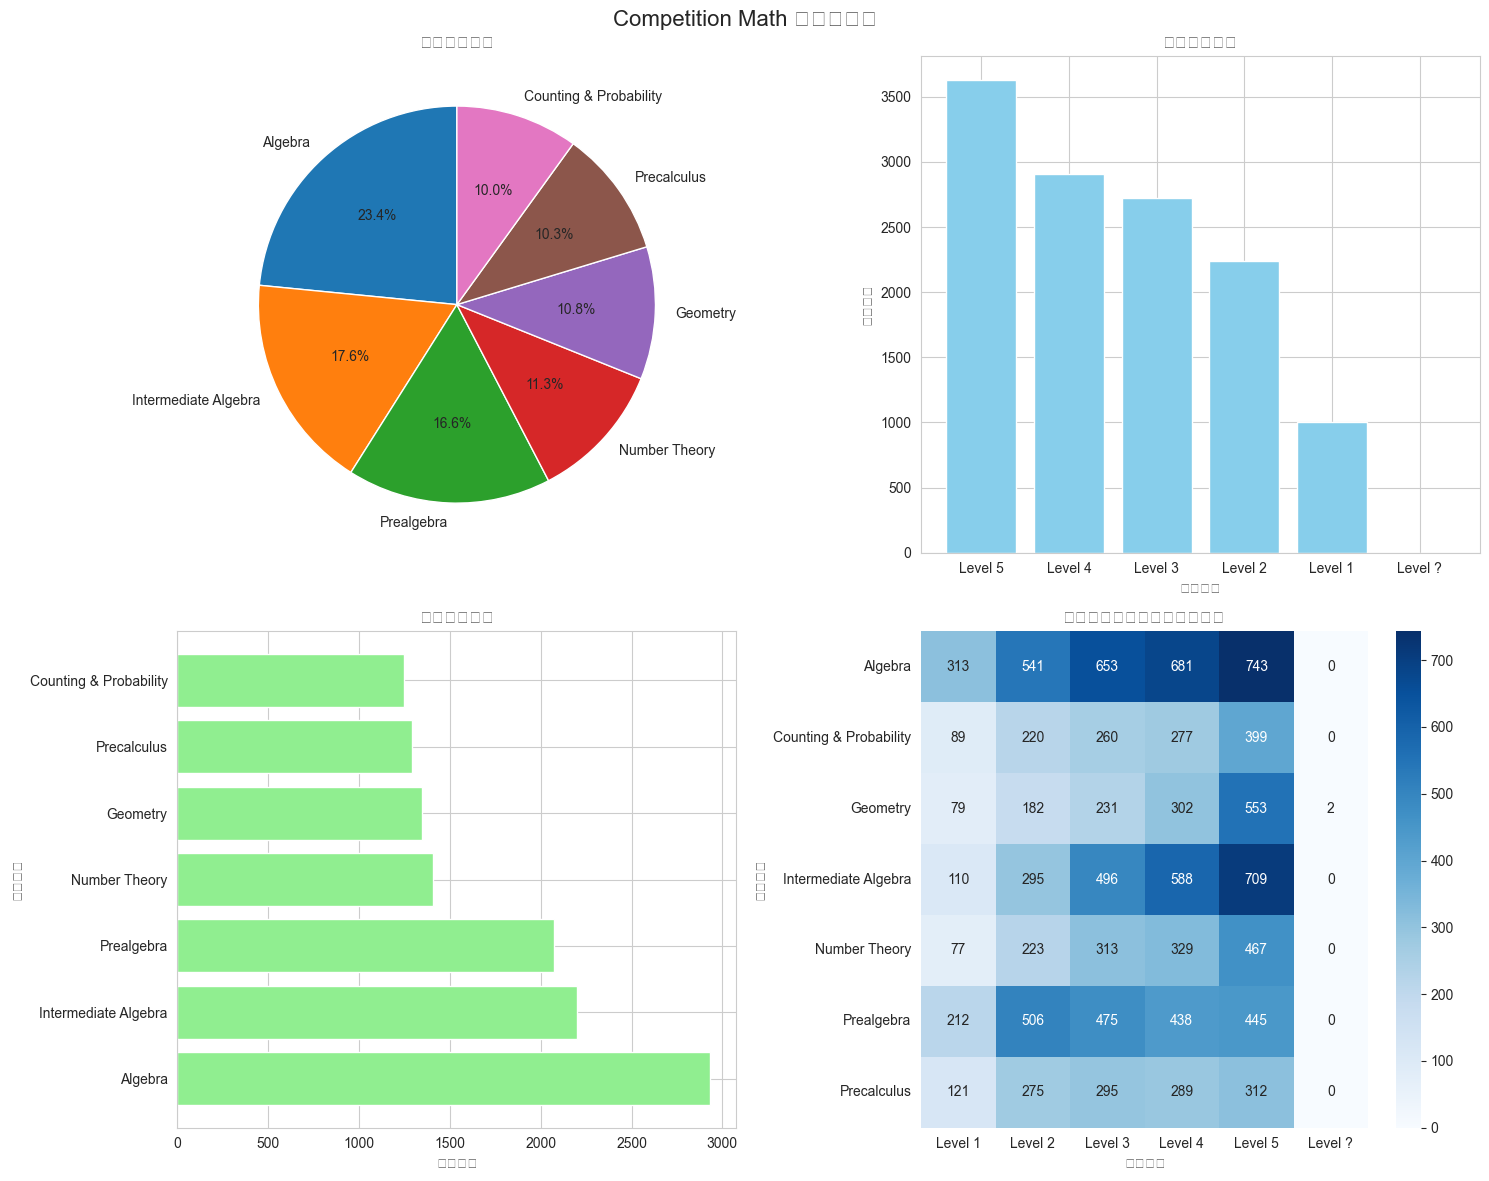

In [14]:
# 创建图表
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Competition Math 数据集分析', fontsize=16)

# 问题类型分布饼图
axes[0, 0].pie(type_counts.values, labels=type_counts.index, autopct='%1.1f%%', startangle=90)
axes[0, 0].set_title('问题类型分布')

# 难度等级分布柱状图
axes[0, 1].bar(level_counts.index, level_counts.values, color='skyblue')
axes[0, 1].set_title('难度等级分布')
axes[0, 1].set_xlabel('难度等级')
axes[0, 1].set_ylabel('问题数量')

# 问题类型分布柱状图
axes[1, 0].barh(type_counts.index, type_counts.values, color='lightgreen')
axes[1, 0].set_title('问题类型分布')
axes[1, 0].set_xlabel('问题数量')
axes[1, 0].set_ylabel('问题类型')

# 热力图显示类型和难度的交叉分布
cross_tab_no_margins = pd.crosstab(df['type'], df['level'])
sns.heatmap(cross_tab_no_margins, annot=True, fmt='d', cmap='Blues', ax=axes[1, 1])
axes[1, 1].set_title('问题类型和难度等级交叉分布')
axes[1, 1].set_xlabel('难度等级')
axes[1, 1].set_ylabel('问题类型')

plt.tight_layout()
plt.show()

## 详细样本展示

现在让我们查看一些具体的问题和解答样本。

In [15]:
def show_samples(df, n=3):
    """
    显示数据集中的样本
    """
    print(f"=== 显示 {n} 个样本 ===")
    
    # 随机选择样本
    samples = df.sample(n=n, random_state=42)
    
    for i, (index, row) in enumerate(samples.iterrows(), 1):
        print(f"\n--- 样本 {i} (索引: {index}) ---")
        print(f"问题类型: {row['type']}")
        print(f"难度等级: {row['level']}")
        print(f"问题: {row['problem']}")
        print(f"解答: {row['solution']}")
        print("-" * 50)

# 显示样本
show_samples(df, 3)

=== 显示 3 个样本 ===

--- 样本 1 (索引: 1766) ---
问题类型: Counting & Probability
难度等级: Level 5
问题: Alexio has 100 cards numbered 1-100, inclusive, and places them in a box. Alexio then chooses a card from the box at random. What is the probability that the number on the card he chooses is a multiple of 2, 3 or 5? Express your answer as a common fraction.
解答: There are 50 numbers between 1-100 inclusive which are divisible by 2 --- all the even numbers. To avoid overcounting, we must find all the odd multiples of 3. Beginning with 3, the sequence of all such numbers is $3, 9, 15\cdots99$, which gives $\dfrac{99-3}{6}+1=17$ such numbers.

Finally, we must find all odd multiples of 5 which are not divisible by 3. These are 5, 25, 35, 55, 65, 85, and 95. This gives a final count of $50+17+7=74$ numbers between 1-100 inclusive which are multiples of 2, 3, or 5.

The probability that Alexio selects one of these is therefore $\boxed{\dfrac{37}{50}}$.
--------------------------------------------------



## 按类型查看样本

让我们按不同类型查看一些样本。

In [16]:
def show_type_samples(df, problem_type, n=2):
    """
    按问题类型显示样本
    """
    print(f"=== {problem_type} 类型样本 ===")
    
    # 筛选特定类型的问题
    type_df = df[df['type'] == problem_type]
    
    # 选择不同难度等级的样本
    samples = []
    for level in sorted(type_df['level'].unique()):
        level_samples = type_df[type_df['level'] == level]
        if not level_samples.empty:
            sample = level_samples.sample(n=1, random_state=42).iloc[0]
            samples.append(sample)
            if len(samples) >= n:
                break
    
    for i, sample in enumerate(samples, 1):
        print(f"\n--- 样本 {i} ---")
        print(f"难度等级: {sample['level']}")
        print(f"问题: {sample['problem']}")
        print(f"解答: {sample['solution']}")
        print("-" * 50)

# 显示不同类型的问题样本
for problem_type in ['Algebra', 'Geometry', 'Number Theory']:
    show_type_samples(df, problem_type, 2)
    print()
    print()

=== Algebra 类型样本 ===

--- 样本 1 ---
难度等级: Level 1
问题: A box with a volume of 16 $\text{cm}^3$ can hold 50 paperclips. How many paperclips could a box with a volume of 48 $\text{cm}^3$ hold?
解答: Let $x$ be the number of paperclips that a box with a volume of 48 $\text{cm}^3$ could hold. Setting up the ratio $\frac{50}{16}=\frac{x}{48}$ and solving for $x$ gives $x=150$.  Hence, a 48 $\text{cm}^3$ box could hold $\boxed{150}$ paperclips.  We also could have noted that tripling the size of the box triples the number of paperclips we can hold, so the new box can hold $50\cdot 3 = 150$ paperclips.
--------------------------------------------------

--- 样本 2 ---
难度等级: Level 2
问题: In a rectangular coordinate system, what is the number of units in the distance from the origin to the point (7, -24)?
解答: We use the distance formula: $$\sqrt{(7-0)^2 + ((-24)-0)^2} = \sqrt{49+ 576} = \sqrt{625} = \boxed{25}.$$- OR -

Note that the origin, the point $(7, -24)$, and the point $(7, 0)$ form a right tr

## 按难度查看样本

让我们按不同难度等级查看一些样本。

In [17]:
def show_level_samples(df, level, n=2):
    """
    按难度等级显示样本
    """
    print(f"=== {level} 难度等级样本 ===")
    
    # 筛选特定难度等级的问题
    level_df = df[df['level'] == level]
    
    # 选择不同类型的样本
    samples = []
    for problem_type in level_df['type'].unique()[:n]:
        type_samples = level_df[level_df['type'] == problem_type]
        if not type_samples.empty:
            sample = type_samples.sample(n=1, random_state=42).iloc[0]
            samples.append(sample)
    
    for i, sample in enumerate(samples, 1):
        print(f"\n--- 样本 {i} ---")
        print(f"问题类型: {sample['type']}")
        print(f"问题: {sample['problem']}")
        print(f"解答: {sample['solution']}")
        print("-" * 50)

# 显示不同难度等级的问题样本
for level in ['Level 1', 'Level 3', 'Level 5']:
    show_level_samples(df, level, 2)
    print()
    print()

=== Level 1 难度等级样本 ===

--- 样本 1 ---
问题类型: Algebra
问题: A box with a volume of 16 $\text{cm}^3$ can hold 50 paperclips. How many paperclips could a box with a volume of 48 $\text{cm}^3$ hold?
解答: Let $x$ be the number of paperclips that a box with a volume of 48 $\text{cm}^3$ could hold. Setting up the ratio $\frac{50}{16}=\frac{x}{48}$ and solving for $x$ gives $x=150$.  Hence, a 48 $\text{cm}^3$ box could hold $\boxed{150}$ paperclips.  We also could have noted that tripling the size of the box triples the number of paperclips we can hold, so the new box can hold $50\cdot 3 = 150$ paperclips.
--------------------------------------------------

--- 样本 2 ---
问题类型: Counting & Probability
问题: The probability of rain tomorrow is $\frac{3}{10}$.  What is the probability that it will not rain tomorrow?  Express your answer as a common fraction.
解答: We can use complementary probability to determine that the probability of its not raining tomorrow is $1 - \frac{3}{10} = \boxed{\frac{7}{10}}$.


## 文本分析

让我们对问题和解答的文本进行一些基本分析。

In [9]:
# 计算问题和解答的长度
df['problem_length'] = df['problem'].str.len()
df['solution_length'] = df['solution'].str.len()

print("=== 文本长度统计 ===")
print("问题长度统计:")
print(df['problem_length'].describe())
print("\n解答长度统计:")
print(df['solution_length'].describe())

# 按类型分析文本长度
print("\n=== 按问题类型分析文本长度 ===")
type_length_stats = df.groupby('type')[['problem_length', 'solution_length']].mean()
print(type_length_stats)

# 按难度等级分析文本长度
print("\n=== 按难度等级分析文本长度 ===")
level_length_stats = df.groupby('level')[['problem_length', 'solution_length']].mean()
print(level_length_stats)

=== 文本长度统计 ===
问题长度统计:
count    12500.000000
mean       202.656080
std        209.180503
min         16.000000
25%         89.000000
50%        146.000000
75%        239.000000
max       4309.000000
Name: problem_length, dtype: float64

解答长度统计:
count    12500.00000
mean       539.27392
std        459.78707
min         26.00000
25%        243.00000
50%        405.00000
75%        682.00000
max       6767.00000
Name: solution_length, dtype: float64

=== 按问题类型分析文本长度 ===
                        problem_length  solution_length
type                                                   
Algebra                     151.511088       365.507677
Counting & Probability      245.043373       530.183133
Geometry                    369.293551       786.030393
Intermediate Algebra        178.942220       666.384440
Number Theory               147.337119       487.527324
Prealgebra                  203.434489       354.030829
Precalculus                 203.268576       822.431115

=== 按难度等级分析文本长度 ===
   

## 总结

### 数据集概览

1. **数据规模**: competition_math数据集包含12,500个数学问题
2. **字段信息**: 
   - problem: 数学问题描述
   - level: 难度等级(Level 1-5)
   - type: 问题类型(Algebra, Geometry等)
   - solution: 详细解题过程

### 问题类型分布
1. **代数 (Algebra)**: 2,931个问题(23.4%)
2. **中等代数 (Intermediate Algebra)**: 2,198个问题(17.6%)
3. **基础代数 (Prealgebra)**: 2,076个问题(16.6%)
4. **数论 (Number Theory)**: 1,409个问题(11.3%)
5. **几何 (Geometry)**: 1,349个问题(10.8%)
6. **预微积分 (Precalculus)**: 1,292个问题(10.3%)
7. **计数与概率 (Counting & Probability)**: 1,245个问题(10.0%)

### 难度等级分布
1. **Level 5**: 3,628个问题(29.0%)
2. **Level 4**: 2,904个问题(23.2%)
3. **Level 3**: 2,723个问题(21.8%)
4. **Level 2**: 2,242个问题(17.9%)
5. **Level 1**: 1,001个问题(8.0%)

### 数据特点
1. **高质量数据**: 每个问题都有完整的逐步解答
2. **多样性**: 涵盖多个数学领域和不同难度等级
3. **教育价值**: 适合用于训练数学问题解决AI模型
4. **研究价值**: 可用于评估AI模型的数学推理能力

这个数据集非常适合用于训练和评估需要复杂数学推理能力的AI模型。